<a href="https://colab.research.google.com/github/DiwashPaudel/DiwashPaudel/blob/main/Assesment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Processing with Python, Numpy Pandas, and Matplotlib Libraries**

COVID-19 Data Analysis Exploring COVID-19 Deaths Data



**Task 2**

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#two ways to load data either from the file or url
# Loading the dataset from thr github URL
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
deaths_df = pd.read_csv(url)
##Reading a data from a file
#deaths_df = pd.read_csv('sample_data/time_series_covid19_deaths_global.csv')

Displaying First FIve rows of data

In [3]:
deaths_df.head()

NameError: name 'deaths_df' is not defined

**Steps of Data Cleaning and Preparation**

1. Identifying and Handling Missing Values
2. Removing Duplicate Entries
3. Converting Date Column to Consistent Date Format
4. Saving the Cleaned Dataset

Step 1:Identify and handle missing values

In [ ]:
# Counting total number of null value ina file
print("Missing values in each column:\n", deaths_df.isnull().sum())

# Handling missing values - Filling with 0
deaths_df.fillna(0, inplace=True)

Missing values in each column:
 Province/State    198
Country/Region      0
Lat                 2
Long                2
1/22/20             0
                 ... 
3/5/23              0
3/6/23              0
3/7/23              0
3/8/23              0
3/9/23              0
Length: 1147, dtype: int64


Step 2: Removing duplicate entries  


In [2]:
deaths_df.drop_duplicates(inplace=True)  # Removing duplicate rows
print("Data After Rmoving Duplicate rows.",deaths_df.head())

NameError: name 'deaths_df' is not defined

Step 3: Convert the date columns to a (YYYY-MM_DD)date format  


In [ ]:
deaths_df.columns = deaths_df.columns.str.replace(' ', '_')  # Replacing spaces with underscores
date_columns = deaths_df.columns[4:]  # All columns after the first four are date columns
# Convert columns to datetime format
for col in date_columns:
    deaths_df[col] = pd.to_datetime(col)

Step 4: Saving the cleaned dataset to a new CSV file  

In [ ]:
#cleaning and saving in cleaned_covid19_deaths_global.csv file in sample folder
deaths_df.to_csv('cleaned_covid19_deaths_global.csv', index=False)

**Task 3**


Displaying First 5 Rows using Head Function

In [ ]:
# Display the first 5 rows of the loaded data
print(deaths_df.head())

  Province/State Country/Region       Lat       Long    1/22/20    1/23/20  \
0              0    Afghanistan  33.93911  67.709953 2020-01-22 2020-01-23   
1              0        Albania  41.15330  20.168300 2020-01-22 2020-01-23   
2              0        Algeria  28.03390   1.659600 2020-01-22 2020-01-23   
3              0        Andorra  42.50630   1.521800 2020-01-22 2020-01-23   
4              0         Angola -11.20270  17.873900 2020-01-22 2020-01-23   

     1/24/20    1/25/20    1/26/20    1/27/20  ...    2/28/23     3/1/23  \
0 2020-01-24 2020-01-25 2020-01-26 2020-01-27  ... 2023-02-28 2023-03-01   
1 2020-01-24 2020-01-25 2020-01-26 2020-01-27  ... 2023-02-28 2023-03-01   
2 2020-01-24 2020-01-25 2020-01-26 2020-01-27  ... 2023-02-28 2023-03-01   
3 2020-01-24 2020-01-25 2020-01-26 2020-01-27  ... 2023-02-28 2023-03-01   
4 2020-01-24 2020-01-25 2020-01-26 2020-01-27  ... 2023-02-28 2023-03-01   

      3/2/23     3/3/23     3/4/23     3/5/23     3/6/23     3/7/23  \
0 2

Summary of the data using describr function

In [ ]:
# Short summary about the data
data_summary = deaths_df.describe()
print("\nData Summary:\n", data_summary)


Data Summary:
               Lat        Long            1/22/2020            1/23/2020  \
count  289.000000  289.000000                  289                  289   
mean    19.582257   22.028574  2020-01-22 00:00:00  2020-01-23 00:00:00   
min    -71.949900 -178.116500  2020-01-22 00:00:00  2020-01-23 00:00:00   
25%      3.919300  -23.041800  2020-01-22 00:00:00  2020-01-23 00:00:00   
50%     21.007900   20.902977  2020-01-22 00:00:00  2020-01-23 00:00:00   
75%     40.339900   88.092400  2020-01-22 00:00:00  2020-01-23 00:00:00   
max     71.706900  178.065000  2020-01-22 00:00:00  2020-01-23 00:00:00   
std     25.918107   77.621936                  NaN                  NaN   

                 1/24/2020            1/25/2020            1/26/2020  \
count                  289                  289                  289   
mean   2020-01-24 00:00:00  2020-01-25 00:00:00  2020-01-26 00:00:00   
min    2020-01-24 00:00:00  2020-01-25 00:00:00  2020-01-26 00:00:00   
25%    2020-01-24 00

**Task 4**

Calculating Mean and Median

In [ ]:
# Step to calculate daily deaths
# We need to calculate the daily deaths by subtracting the previous day's total from the current day's total

# Calculate daily deaths by taking the difference between consecutive days
daily_deaths = deaths_df[date_columns].diff(axis=1).fillna(0)

# Sum the daily deaths across all countries for each day
total_daily_deaths = daily_deaths.sum(axis=0)

# Calculate mean and median of the daily cases
mean_daily_deaths = total_daily_deaths.mean()
median_daily_deaths = total_daily_deaths.median()

print(f"Mean Daily Deaths: {mean_daily_deaths}")
print(f"Median Daily Deaths: {median_daily_deaths}")

<ipython-input-31-e883f4a9ee47>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  daily_deaths = deaths_df[date_columns].diff(axis=1).fillna(0)


TypeError: unsupported operand type(s) for +: 'numpy.int64' and 'Timedelta'

In [ ]:
#Calculating median of the daily cases
median_daily_deaths = daily_deaths.median()
print(f"Median Daily Deaths: {median_daily_deaths}")

NameError: name 'daily_deaths' is not defined

**Task 4**

Calculation of daily death cases worldwide

In [ ]:
# calculating daily deaths
daily_deaths = deaths_df[date_columns].diff(axis=1).fillna(0)

# Sum the daily deaths across all countries for each day
total_daily_deaths_worldwide = daily_deaths.sum(axis=0)
total_daily_deaths = total_daily_deaths_worldwide.reset_index()

# Renaming  columns
total_daily_deaths.columns = ['Date', 'Total_Deaths']

print(total_daily_deaths.head())  # Display the first few rows of the total daily deaths

1/22/2020                    0
1/23/2020    289 days 00:00:00
1/24/2020    289 days 00:00:00
1/25/2020    289 days 00:00:00
1/26/2020    289 days 00:00:00
dtype: object


In [ ]:
# Ensure that the Total_Deaths column is numeric
total_daily_deaths['Total_Deaths'] = pd.to_numeric(total_daily_deaths['Total_Deaths'], errors='coerce').fillna(0)

# Function to calculate daily increase in deaths
def daily_death_increase(death_series):
    return death_series.diff().fillna(0)

# Calculating the daily increase
total_daily_deaths['Daily_Increase'] = daily_death_increase(total_daily_deaths['Total_Deaths'])

print(total_daily_deaths[['Date', 'Daily_Increase']].head())  # Display the first few results

        Date  Daily_Increase
0  1/22/2020             0.0
1  1/23/2020             0.0
2  1/24/2020             0.0
3  1/25/2020             0.0
4  1/26/2020             0.0


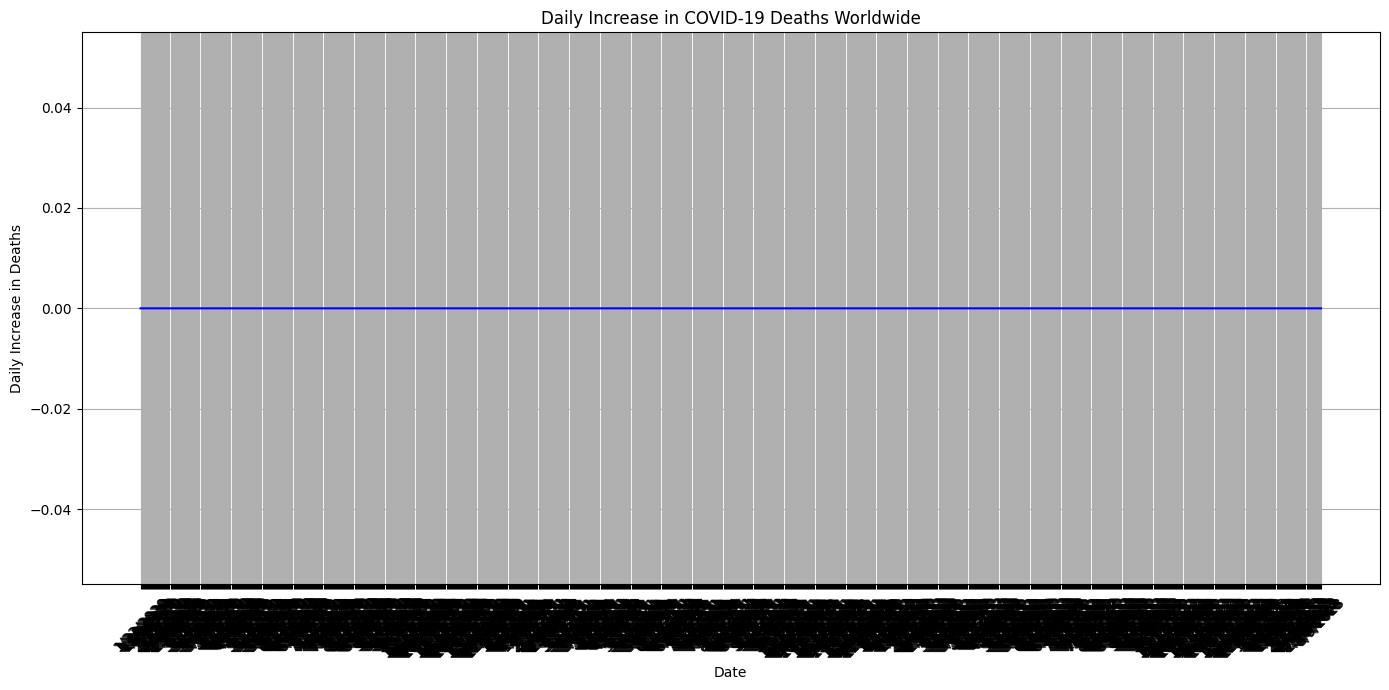

In [ ]:
# Visualizing daily death cases worldwide
plt.figure(figsize=(14, 7))
plt.plot(total_daily_deaths['Date'], total_daily_deaths['Daily_Increase'], color='blue')
plt.title('Daily Increase in COVID-19 Deaths Worldwide')
plt.xlabel('Date')
plt.ylabel('Daily Increase in Deaths')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()